In [1]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [2]:
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [3]:
print("Target names: {}".format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


In [4]:
print("Feature names: \n{}".format(iris_dataset['feature_names']))

Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
print("Shape of data: {}".format(iris_dataset.data.shape))

Shape of data: (150, 4)


In [6]:
print("Type of data: {}".format(type(iris_dataset['data'])))

Type of data: <class 'numpy.ndarray'>


In [7]:
print(iris_dataset['data'][:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [8]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

In [9]:
print(X_train.shape)

(112, 4)


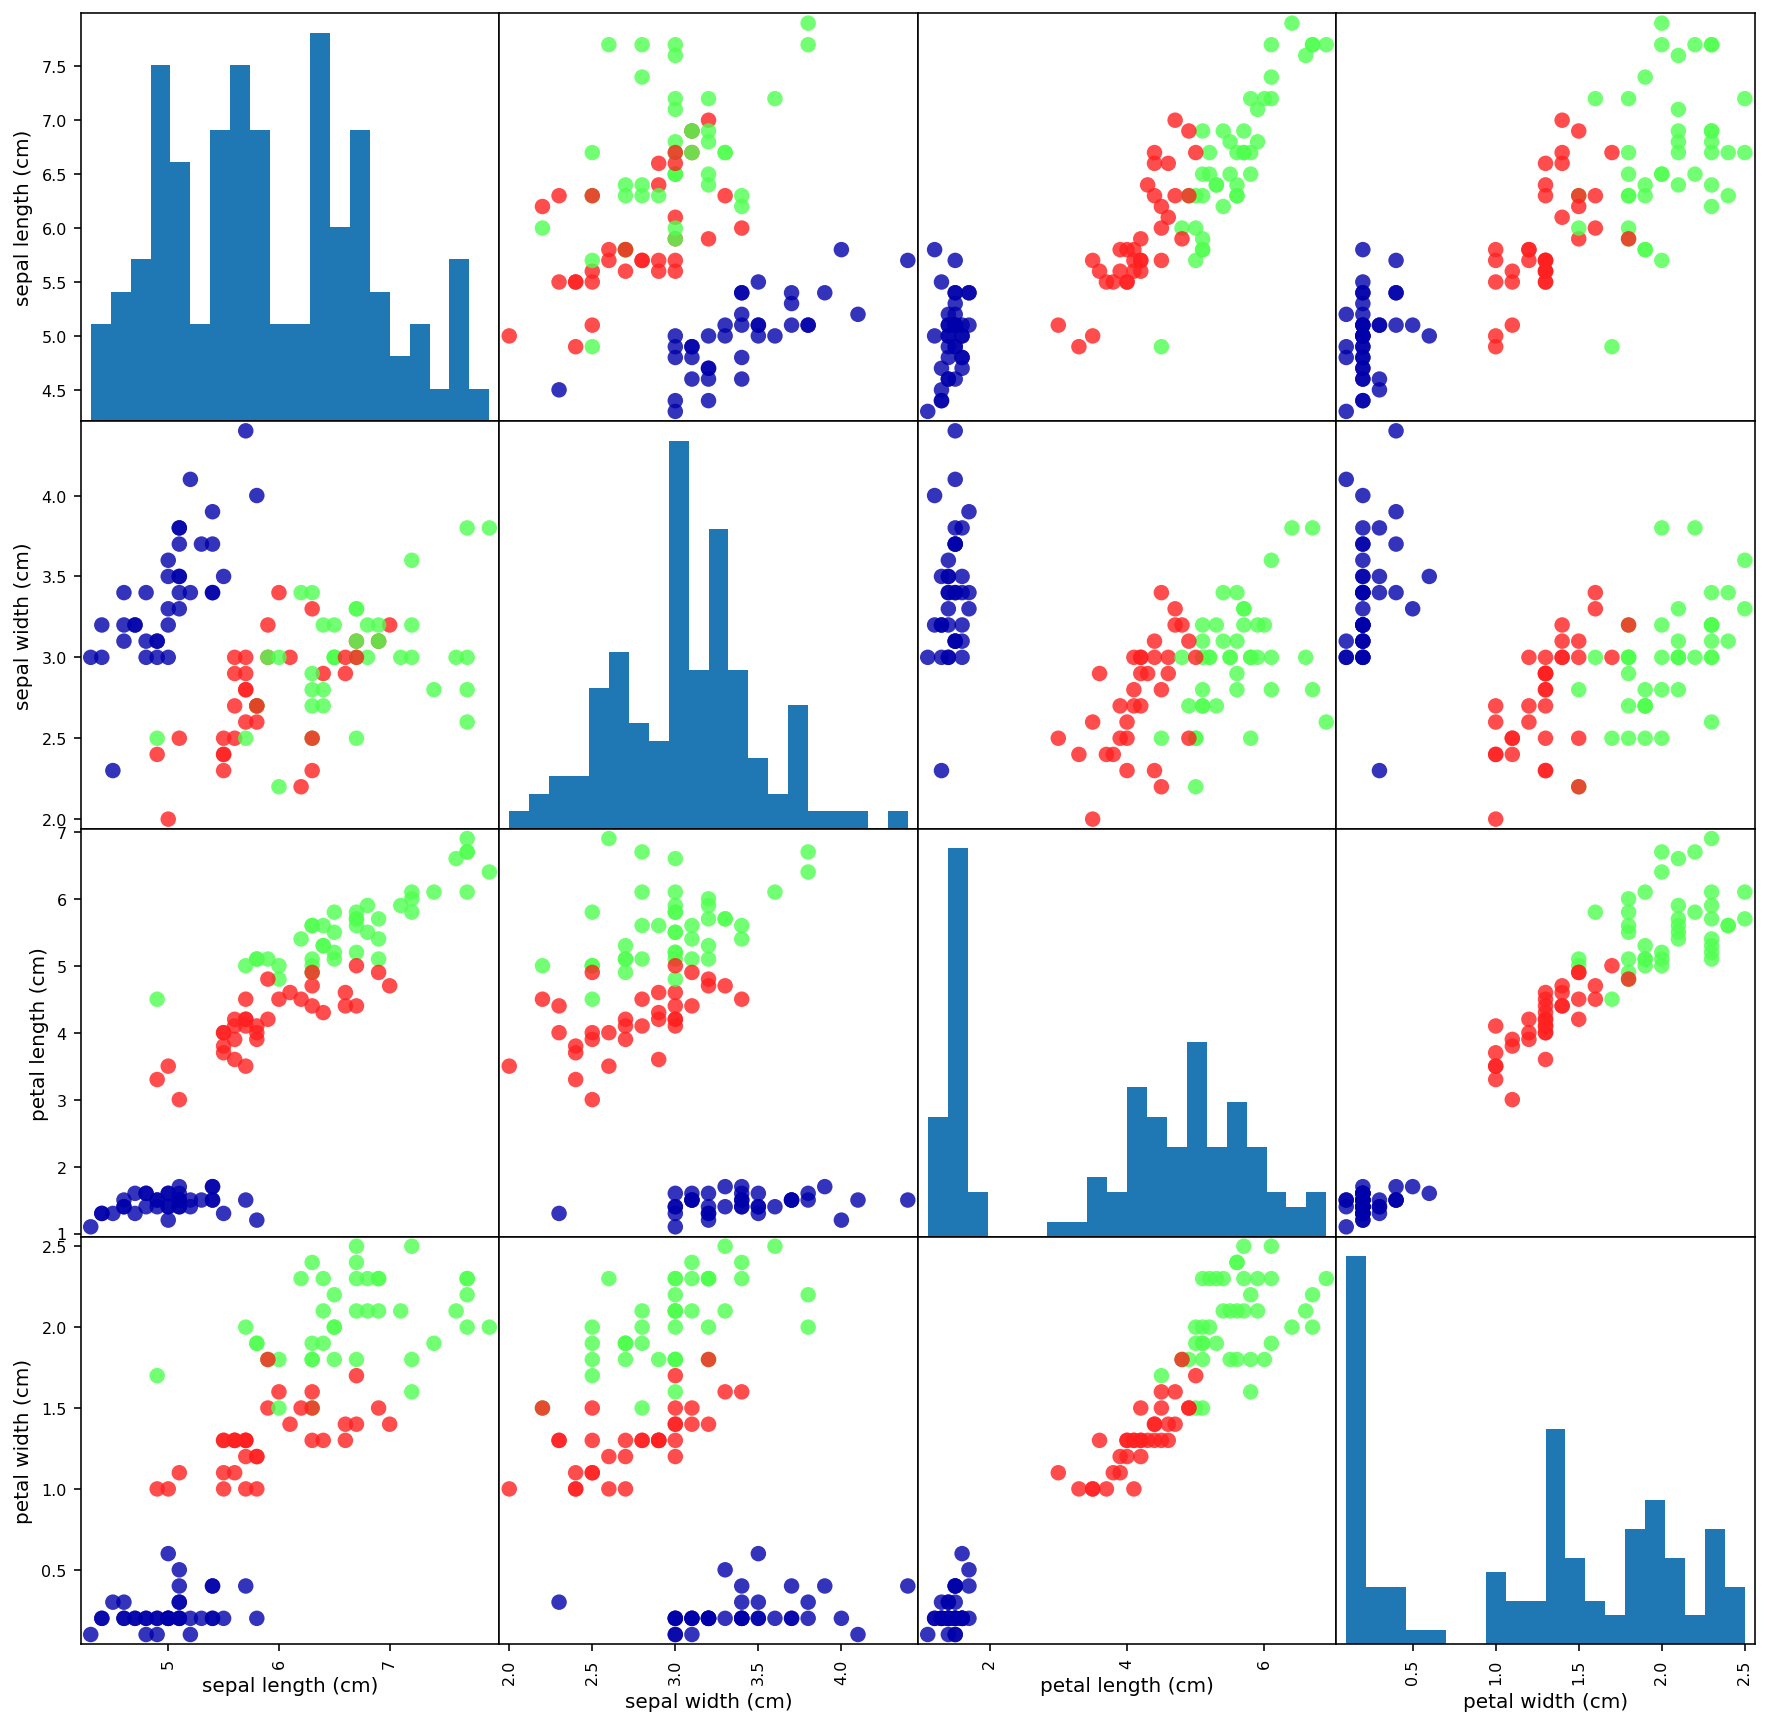

In [10]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import mglearn

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# 利用X_train中的数据创建DataFrame
# 利用iris_dataset.feature_names中的字符串对数据列进行标记
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# 利用DataFrame创建散点图矩阵，按y_train着色
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)


In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [12]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [13]:
#我们将这朵花的测量数据转换为二维 NumPy 数组的一行，这是因为 scikit-learn的输入数据必须是二维数组
X_new = np.array([[5, 2.9, 1, 0.2]]) 
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


In [14]:
prediction = knn.predict(X_new) 
print("Prediction: {}".format(prediction)) 
print("Predicted target name: {}".format(iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


In [15]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [16]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97


In [17]:
#第二种方法
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97
